# Lab Assignment 4 
# Vashu Agarwal

# E21CSEU0054

In [1]:
# Considering total person 10000

#Pa is unconditional probability of disease
#Pb is unconditional probability of a positive test
# Pba is the sensitivity of test
# Pab is the probability of disease(Pa) ,given that patient has a positive test (Pb) 

# Q1 is If the patient tests positive, what are the chances the patient is sick?


Pa = (100/10000)
Pb = 198/10000
Pba = 0.99
Pab = (Pba*Pa)/Pb
print("the probability of disease(Pa) ,given that patient has a positive test (Pb) ",Pab)


the probability of disease(Pa) ,given that patient has a positive test (Pb)  0.5


In [2]:
# Q2
P_A1 = 1/3 #Event of choosing First box
P_A2 = 1/3 #Event of choosing Second box
P_A3 = 1/3 #Event of choosing Third box

# X Event of drawing red ball from box

P_X_A1 = 3/(3+2) #
P_X_A2 = 4/(4+5)
P_X_A3 = 2/(2+4)

P_A2_X = (P_A2*P_X_A2)/(P_A1*P_X_A1+P_A2*P_X_A2+P_A3*P_X_A3)

print("Probability of that second box choosen given that red ball is drawn out \n",P_A2_X)






Probability of that second box choosen given that red ball is drawn out 
 0.32258064516129037


In [3]:


import numpy as np
def prob(array, a, op):
    p_p_a = 0
    p_p = 0
    p_a = 0
    if(a == 'a'):
        alpha = 0
    if(a == 'b'):
        alpha = 1
    if(a == 'c'):
        alpha = 2
    for i in range(10):
        if(array[alpha][i] == '1'):
            p_a += 1
        if(array[3][i] == op):
            p_p += 1
        if(array[alpha][i] == '1' and array[3][i] == op):
            p_p_a += 1
    p_p_a = p_p_a / p_p
    p_p = p_p / 10
    p_a = p_a / 10
    p_a_p = (p_p_a * p_a)/p_p
    return p_a_p
array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, '+', '-', '-', '-', '+', '+', '-', '-', '+', '+']).reshape(4,10)
print("p(A|+): {}".format(prob(array, 'a', '+')))
print("p(B|+): {}".format(prob(array, 'b', '+')))
print("p(C|+): {}".format(prob(array, 'c', '+')))
print("p(A|-): {}".format(prob(array, 'a', '-')))
print("p(B|-): {}".format(prob(array, 'b', '-')))
print("p(C|-): {}".format(prob(array, 'c', '-')))

p(A|+): 0.6
p(B|+): 0.12
p(C|+): 1.4400000000000002
p(A|-): 0.4
p(B|-): 0.24
p(C|-): 1.8


In [4]:
# Q3
P_a1_m = 2/5
P_a0_m = 3/5
P_a1_p = 3/5
P_a0_p = 2/5

P_b1_m = 2/5
P_b0_m = 3/5
P_b1_p = 1/5
P_b0_p = 4/5

P_c1_m = 1
P_c0_m = 0
P_c1_p = 4/5
P_c0_p = 1/5

P_p = 5/10
P_m = 5/10
clas = ""

P_a0_b1_c0 = (P_a0_p*P_b1_p*P_c0_p)*P_p

P_a0_b1_c0_2 = (P_a0_m*P_b1_m*P_c0_m)*P_m

if(P_a0_b1_c0>P_a0_b1_c0_2):
    clas = "+"
else:
    clas = "-"

    
print("The class should be ",clas)



The class should be  +


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

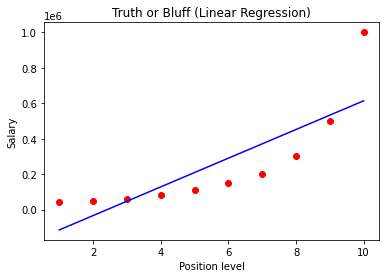

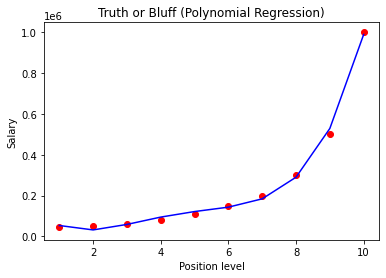

RMSE
[163388.73519273]
R2 Score
[0.66904123]


In [6]:
# Q4
dataset = pd.read_csv('/Users/vashuagarwal/Downloads/BENNETT  things/3rd sem bennett/CSET 211 SML/lab/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#graph using linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()
#graph using polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

viz_polymonial()



mean_x = np.mean(X)
mean_y = np.mean(y)
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (y[i] - mean_y) ** 2
    ss_res += (y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)